<a href="https://colab.research.google.com/github/soosung80/capstone-210-fall2022/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Setup the libraries
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/W210/capstone project - shared/datasets

/content/drive/.shortcut-targets-by-id/1vOMBFxdx1WcJOKcE-Uh1OYCokKjihaLP/capstone project - shared/datasets


In [ ]:
menu = pd.read_csv('Annual_Data2018.csv',encoding='cp1252')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (9,35,36,37,39,40) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
menu.count()

Menu_Item_ID              71172
Customizable_Builds       44284
Customizable_Build_ID     71172
Year                      71172
Restaurant                71172
Food_Category             71172
Item_Name                 71172
Item_Description          71172
Serving_Size              20564
Serving_Size_text            33
Serving_Size_Unit         20587
Serving_Size_household    19563
Calories                  66968
Total_Fat                 66253
Saturated_Fat             66127
Trans_Fat                 63372
Cholesterol               64476
Sodium                    66529
Potassium                   996
Carbohydrates             65700
Protein                   65419
Sugar                     64632
Dietary_Fiber             65079
Calories_100g             20174
Total_Fat_100g            19576
Saturated_Fat_100g        19574
Trans_Fat_100g            17964
Cholesterol_100g          19571
Sodium_100g               19828
Potassium_100g              547
Carbohydrates_100g        19737
Protein_

In [ ]:
menu = menu.drop_duplicates(subset=['Menu_Item_ID'])
menu = menu.dropna(subset=['Calories'])
menu.count()

Menu_Item_ID              26624
Customizable_Builds        2618
Customizable_Build_ID     26624
Year                      26624
Restaurant                26624
Food_Category             26624
Item_Name                 26624
Item_Description          26624
Serving_Size              11594
Serving_Size_text             9
Serving_Size_Unit         11593
Serving_Size_household     7668
Calories                  26624
Total_Fat                 26369
Saturated_Fat             26356
Trans_Fat                 24939
Cholesterol               25970
Sodium                    26491
Potassium                   438
Carbohydrates             26203
Protein                   26162
Sugar                     25992
Dietary_Fiber             25865
Calories_100g             11575
Total_Fat_100g            11430
Saturated_Fat_100g        11428
Trans_Fat_100g            10565
Cholesterol_100g          11363
Sodium_100g               11551
Potassium_100g              265
Carbohydrates_100g        11389
Protein_

In [ ]:
menu_reduced = menu[['Menu_Item_ID', 'Restaurant', 'Food_Category', 'Item_Name', 'Calories', 'Total_Fat','Saturated_Fat','Trans_Fat','Cholesterol', 'Sodium', 'Potassium', 'Carbohydrates', 'Protein', 'Sugar', 'Dietary_Fiber', 'Kids_Meal', 'Limited_Time_Offer', 'Regional', 'Shareable', 'Combo_Meal']]
menu_reduced.head(20)
menu_reduced.to_csv('/content/menu_reduced.csv')
files.download('/content/menu_reduced.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# summary of data
menu_reduced.describe()

,Menu_Item_ID,Calories,Total_Fat,Saturated_Fat,Trans_Fat,Cholesterol,Sodium,Potassium,Carbohydrates,Protein,Sugar,Dietary_Fiber,Kids_Meal,Limited_Time_Offer,Regional,Shareable,Combo_Meal
count,26624.000000,26624.000000,26369.000000,26356.000000,24939.000000,25970.000000,26491.000000,438.000000,26203.000000,26162.000000,25992.000000,25865.000000,26624.000000,26624.000000,26624.000000,26624.000000,26624.000000
mean,109378.157114,386.749318,17.515057,6.469627,0.423545,58.874256,709.454495,274.301370,42.467012,14.761274,21.422417,2.062888,0.063251,0.022198,0.037973,0.025578,0.006761
std,63935.482876,442.293385,25.919252,10.850678,15.723528,109.162419,1058.364525,331.196258,48.837283,23.751505,35.595920,4.191981,0.243419,0.147330,0.191135,0.157877,0.081947
min,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45286.750000,120.000000,0.000000,0.000000,0.000000,0.000000,70.000000,35.000000,10.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,130966.500000,270.000000,9.000000,3.000000,0.000000,20.000000,340.000000,180.000000,31.200000,7.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,172207.250000,520.000000,24.000000,9.000000,0.000000,70.000000,970.000000,400.000000,60.000000,20.000000,27.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,179840.000000,10205.000000,556.000000,315.000000,1470.000000,2680.000000,24970.000000,1890.000000,1554.000000,679.000000,783.000000,279.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# data type check
menu_reduced.dtypes

Menu_Item_ID            int64
Restaurant             object
Food_Category          object
Item_Name              object
Calories              float64
Total_Fat             float64
Saturated_Fat         float64
Trans_Fat             float64
Cholesterol           float64
Sodium                float64
Potassium             float64
Carbohydrates         float64
Protein               float64
Sugar                 float64
Dietary_Fiber         float64
Kids_Meal               int64
Limited_Time_Offer      int64
Regional                int64
Shareable               int64
Combo_Meal              int64
dtype: object

In [ ]:
menu_reduced.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Menu_Item_ID,-0.411810,-1.446745
Calories,5.046820,57.184207
Total_Fat,4.664973,47.812728
Saturated_Fat,7.428893,122.017928
Trans_Fat,80.382286,6854.079545
Cholesterol,5.005652,48.402961
Sodium,4.965420,52.897587
Potassium,2.015253,4.974223
Carbohydrates,5.734360,102.503150
Protein,6.177698,86.260116


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


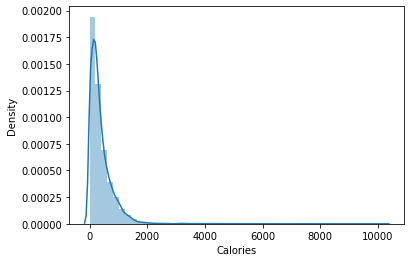

In [ ]:
# Calories distribution
sns.distplot(menu_reduced['Calories'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


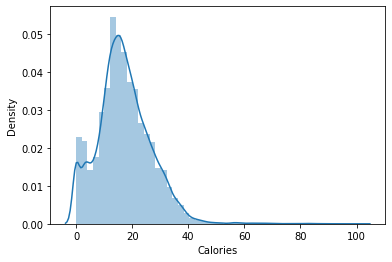

In [ ]:
# Calories sqrt normalization distribution
sns.distplot(np.sqrt(menu_reduced['Calories']))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


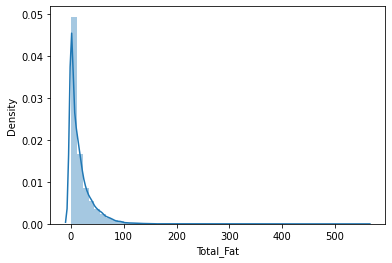

In [ ]:
# Total fat distribution
sns.distplot(menu_reduced['Total_Fat'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


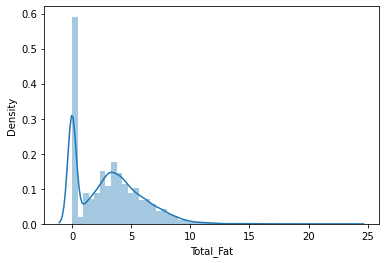

In [ ]:
# Total fat sqrt normalization distribution
sns.distplot(np.sqrt(menu_reduced['Total_Fat']))

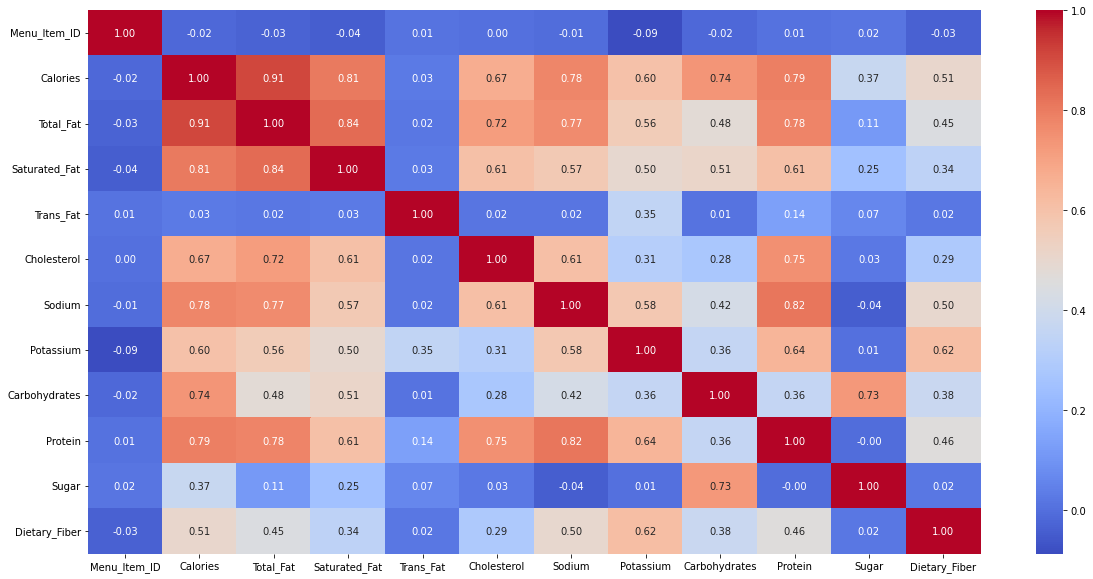

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.heatmap(menu_reduced.iloc[:,:-5].corr(), annot=True, cmap = 'coolwarm',alpha=2, fmt='.2f')
fig.savefig('/content/heatmap.png')

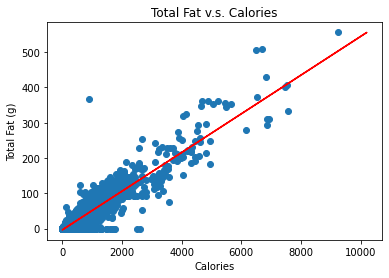

In [ ]:
# total fat v.s calories
scatter_fat_calories, ax = plt.subplots()
ax.scatter(menu_reduced.Calories ,menu_reduced.Total_Fat)
idx = np.isfinite(menu_reduced.Calories) & np.isfinite(menu_reduced.Total_Fat)
m, b = np.polyfit(menu_reduced.Calories[idx], menu_reduced.Total_Fat[idx], 1)
ax.plot(menu_reduced.Calories, m*menu_reduced.Calories+b,color='red')
ax.set_xlabel('Calories')
ax.set_ylabel('Total Fat (g)')
ax.set_title('Total Fat v.s. Calories')
plt.show()

In [ ]:
# Covariance, correlation coefficient
cov_fat_calories = np.cov(menu_reduced.Calories[idx], menu_reduced.Total_Fat[idx])
print(cov_fat_calories)
CC_fat_calories = np.corrcoef(menu_reduced.Calories[idx], menu_reduced.Total_Fat[idx])
print(CC_fat_calories[0,1])

[[186774.02946513  10228.70002015]
 [ 10228.70002015    671.80764061]]
0.9131449644117112


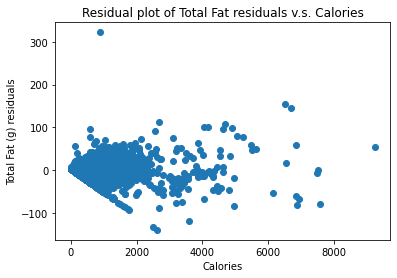

In [ ]:
# residual plot
residual_fat_calories = menu_reduced.Total_Fat[idx] - (m * menu_reduced.Calories[idx] + b)
scatter_fatresidual_calories, ax = plt.subplots()
ax.scatter(menu_reduced.Calories[idx], residual_fat_calories)
ax.set_xlabel('Calories')
ax.set_ylabel('Total Fat (g) residuals')
ax.set_title('Residual plot of Total Fat residuals v.s. Calories')
plt.show()

In [ ]:
# remove outlier
outlier_idx = residual_fat_calories[residual_fat_calories > 300].index[0]
residual_fat_calories = residual_fat_calories[residual_fat_calories < 300]
print(outlier_idx)
menu_reduced = menu_reduced[idx].drop(index=28609)

28609


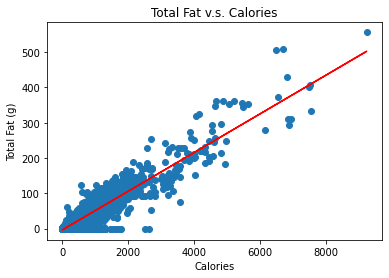

In [ ]:
# total fat v.s calories
scatter_fat_calories, ax = plt.subplots()
ax.scatter(menu_reduced.Calories ,menu_reduced.Total_Fat)
idx = np.isfinite(menu_reduced.Calories) & np.isfinite(menu_reduced.Total_Fat)
m, b = np.polyfit(menu_reduced.Calories[idx], menu_reduced.Total_Fat[idx], 1)
ax.plot(menu_reduced.Calories, m*menu_reduced.Calories+b,color='red')
ax.set_xlabel('Calories')
ax.set_ylabel('Total Fat (g)')
ax.set_title('Total Fat v.s. Calories')
plt.show()

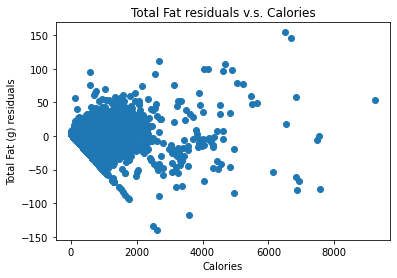

In [ ]:
# residual plot without outlier
scatter_fatresidual_calories, ax = plt.subplots()
ax.scatter(menu_reduced.Calories[idx], residual_fat_calories)
ax.set_xlabel('Calories')
ax.set_ylabel('Total Fat (g) residuals')
ax.set_title('Total Fat residuals v.s. Calories')
plt.show()

In [ ]:
# Covariance, correlation coefficient
cov_fat_calories = np.cov(menu_reduced.Calories[idx], menu_reduced.Total_Fat[idx])
print(cov_fat_calories)
CC_fat_calories = np.corrcoef(menu_reduced.Calories[idx], menu_reduced.Total_Fat[idx])
print(CC_fat_calories[0,1])

[[186771.10299112  10222.25880821]
 [ 10222.25880821    667.17410071]]
0.9157405402780405


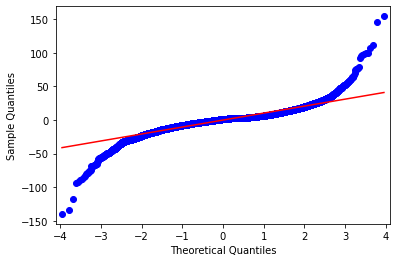

In [ ]:
sm.qqplot(residual_fat_calories, line='s')
plt.show()